# Data Science Intern Challenge

## Solution to Question 1

The analysis below was conducted using python3.

### Importing the data set into the notebook.

The goal is to to convert the data set into a format that will be easily accessible and readable in python. I will begin by saving the dataset as a csv file into my directory. Then, I will import the pandas library under the alias 'pd', as this contains the read_csv function that will enable me to read the csv file and perform operations on it, as well as some handy functions to be used throughout the analysis.
Now, I can import the data set. 

In [1]:
# This cell will be include all imported libraries. It will be updated throughout my analysis as needed.

import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('./dataset.csv')

### Exploratory Data Analysis

The next step is to conduct an exploratory data analysis on the data set. This is to make sure the data is clean andd usable, and generally explore the data distribution.


In [2]:
dataset.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


**Checking for missing values.**

In [3]:
dataset.isnull().any()

order_id          False
shop_id           False
user_id           False
order_amount      False
total_items       False
payment_method    False
created_at        False
dtype: bool

There are no missing values.

**Checking for duplicate rows**

In [4]:
dataset.duplicated().sum()

0

There are no duplicate rows.

In [5]:
dataset.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


I believe the data is sufficient enough to proceed to the analytical process.

A quick glance at the summary statistics from thev EDA conducted above shows that mean was the metric used to calculate the AOV of 3145.13 USD. I will be make use of the **.describe()** function again, but only on the order_amount column to get a better understanding.

In [6]:
dataset.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

a) The summary statistics shows that 25% of the order amounts are 163 USD or less, 50% of the order amounts are 284 USD or less, and 75% of the order amounts are 390 USD or less. That shows that majority of the orders totalled at less than 390 USD, so an estimated average spend of 3145.13 per order, is not a true reflection of the data. A major disadvantage of using mean as a measure of central tendency is that it is sensitive to extreme values or outliers. It seems like we might have some outliers that are affecting our calculation of the mean. 

The AOV of 3145.13 USD was gotten by taking the mean of the order amounts.  
Order Amount (order_amount column) = Price of item (not given in the dataset) * number of items bought per order(total_items column).  

The two variables that make up the order amount are the price of an item or the number of items bought per order. If any of these variables are unusually high, the order amount in turn will be high, automatically skewing our calculation. So we should be looking out for extreme prices and extreme number of items bought per order.

### Examining for outlying items bought per order

We can already get a glimpse of our culprits from the summary statistics above which shows the maximum order amount was a whooping 704000 USD, which doesn't fall even in the 75th percentile. That alone, is enough to corrrupt our calculations, but I have to take a further look.

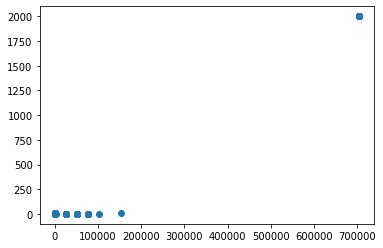

In [7]:
plt.scatter(dataset['order_amount'], dataset['total_items'])
plt.show()

In [8]:
dataset[dataset['total_items'] > 1750]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


As suspected, there are a number of unusual orders of 2000 items per order from shop 42. The order always comes from the same customer so it seems like a regular bulk purchase. To get a clearer picture of the proportion of these orders, with respect to the rest of the datset, I will plot a bar chart.

In [9]:
order_volume = dataset.groupby('total_items').size().reset_index(name='count')
order_volume = order_volume.sort_values('total_items')
order_volume

,total_items,count
0,1,1830
1,2,1832
2,3,941
3,4,293
4,5,77
5,6,9
6,8,1
7,2000,17


<AxesSubplot:title={'center':'Order Volume Distribution'}, xlabel='total_items', ylabel='count'>

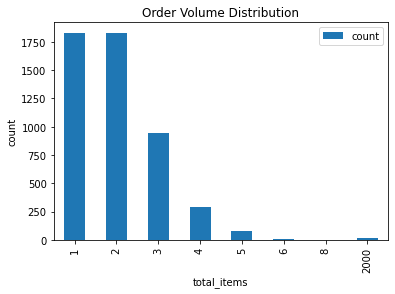

In [10]:
order_volume.plot('total_items', 'count', kind="bar", ylabel='count', title='Order Volume Distribution')

Here we can see that the values along the x-axis go from 1 to 8 then there's a huge jump straight to 2000. We can also see that a majority of the number of items placed per order over a 30 day period lie between 1 and 8, save for the 17 orders which were 2000 items per order. Those 17 orders are indeed outliers.

### Examining for outlying prices

I will extract the necessary columns into a dataframe called 'price_exam'. I will create a new column called 'sneaker_price' which calculates the price of each sneaker sold in each particular order.

In [11]:
price_exam = pd.DataFrame(dataset[['order_amount', 'total_items', 'shop_id']])
price_exam['sneaker_price'] = price_exam['order_amount'] / price_exam['total_items']
price_exam = price_exam.sort_values(by='sneaker_price', ascending= False)
price_exam

,order_amount,total_items,shop_id,sneaker_price
4420,77175,3,78,25725.0
2906,77175,3,78,25725.0
4505,25725,1,78,25725.0
493,51450,2,78,25725.0
2452,51450,2,78,25725.0
...,...,...,...,...
2714,180,2,92,90.0
3915,180,2,92,90.0
4760,90,1,92,90.0
2128,180,2,92,90.0


Taking a look at the first few rows, I can see an extreme value already. Shop 78 seems to be selling sneakers for 25725 USD per pair! Now, this could be an indicator of fraudulent activity, or shop 78 sells a luxury or very expensive brand of sneakers. Let's analyse a little to check for any new discoveries.

In [12]:
price_exam.groupby('sneaker_price').size().reset_index(name='count')

,sneaker_price,count
0,90.0,42
1,94.0,55
2,101.0,42
3,111.0,40
4,112.0,124
5,114.0,59
6,116.0,58
7,117.0,77
8,118.0,118
9,122.0,50


It seems that shop 78 is the only store with an extreme price, as all the rest of the shops sell sneakers for prices within a reasonable range.

Now we have discovered the outliers that are skewing the distribution. Since each of these shops sell only one model of sneakers, and different shops each sell sneakers of different prices, also while having varying order sizes, and outliers in the distribution, the mean amount spent at each shop by a customer can largely vary, depending on which shop they purchase from. Therefore, calculating the AOV by simply taking the average of the order amount won't be a proper representation of an average customer's purchasing habits. 

A better approach will be to take the average order value of each shop, which will only take into account order amount and total number of orders for their respective shops. Then, take the average of all those averages. That should give us a more reliable value of a customer's average order value. I reckon this will still slightly skew the average, given that the shops with outliers will have greater AOVs than others, and end up being outliers. But I can't conclude yet. Let's give it a shot.

### Taking the average order value of each shop:

**Step 1**: Extracting the necessary columns, taking the aAOV of each shop, and storing it in a new column called 'aov'.

In [13]:
aov_per_shop = dataset[['shop_id', 'order_amount', 'total_items']]
aov_per_shop = aov_per_shop.groupby('shop_id').sum([['order_amount', 'total_items']])
aov_per_shop['aov'] = aov_per_shop['order_amount'] / aov_per_shop['total_items'] 
aov_per_shop

,order_amount,total_items,aov
shop_id,,,
1,13588,86,158.0
2,9588,102,94.0
3,14652,99,148.0
4,13184,103,128.0
5,13064,92,142.0
...,...,...,...
96,16830,110,153.0
97,15552,96,162.0
98,14231,107,133.0


**Step 2**: Taking the average of all the AOV's of all shops

In [14]:
aov_per_shop['aov'].mean()

407.99

This is a much better value, however, still pretty pricey given the data distribution (it doesn't even fall in the 75th percentile of order amounts so it's not very accurate). Let us consider another metric altogether. 
Since the distribution is skewed towards lower values, median or mode might give more accurate values. Let's take a look at each metric.

In [15]:
median_aov = aov_per_shop['aov'].median()
f"Median AOV: {str(median_aov)}"

'Median AOV: 153.0'

In [16]:
mode_aov = aov_per_shop['aov'].mode()[0]
f"Mode AOV: {str(mode_aov)}"

'Mode AOV: 153.0'

b) I would report the median for this dataset as the core problem of previous caalculations were outliers, and median is more resistant to outliers.

c) The value is 153.0 USD

## Solution to Question 2

a) To obtain this, I will perform a join on the Orders table(which contains all unique orders) and Shippers table(which contains the shipper names). Then I will filter for only orders shipped by Speedy Express. Since the value we are trying to get is the number of orders shipped by a particular shipper, the relevant columns to select will be ShipperName and a new column 'NumberOfOrders' which counts the number of all unique orders. 

Using the above query, I can deduce that 54 orders were shipped by Speedy Express in total.

b) We can obtain this by merging the Employees table (which contains employee details, including employee last name), with the Orders table (which contains all unique orders). Then I will group the result by LastName to know how many orders each employee had. After, I will sort the column NumberOfOrders in descending order. Then we can see all employee orders from highest to lowest. Since the value we are trying to get is the last name of the employee with the most orders, the relevant columns to select will be LastName, and a new column 'NumberOfOrders' which counts the number of all unique orders. I only need the highest for this question so I will limit my result to the first row.

Using the above query, I can deduce that the last name of the employee with the most orders is Peacock with a total of 40 orders.

c) I will start by merging the Customers table with the Orders table to match all orders to the respective customers. Now that I have that, I will filter for only orders where the country is Germany to get the orders placed by customers in Germany. Next, I have to merge the existing table to the OrderDetails table to get the ProductID's and Quantity of each product ordered by each customer in Germany. In order to get the ProductName, which is what we're looking for, I have to join our new table to the Products table which contains the ProductName and ProductId for each product.   
What we have now is a table that shows all products, as well as the quantity ordered by each customer in Germany.
Now I can find the total quantity for each product by grouping by ProductName and summing the quantity column.  
Finally, I will order the result by the total quantity for each product, arrange it in descending order and limit the result to the first row since I am only interested in the product with the highest total orders. 
I am selecting the ProductName and a new column 'TotalOrders' which will contain the total quantity for each product. 

The query above shows that the product ordered the most by customers in Germany is Boston Crab Meat with a sum total of 160 orders. 